In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML, display_html

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 3]
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels
import seaborn as sns

import scipy
from scipy.stats import pearsonr

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('fivethirtyeight')


In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
data = pd.read_csv('Fremont.csv', index_col='Date')
data.columns = ['Total', 'East', 'West']
data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')

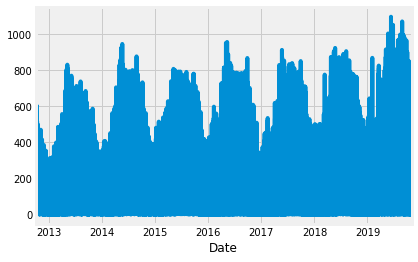

In [7]:
display(data['Total'].plot())

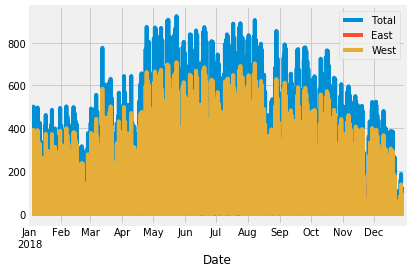

In [9]:
data['2018'].plot()

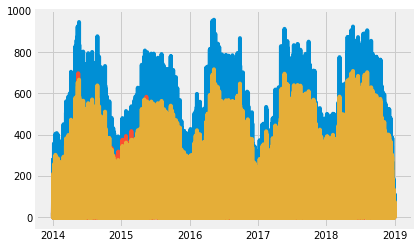

In [10]:
plt.plot(data['2014':'2018'][['Total','East','West']])

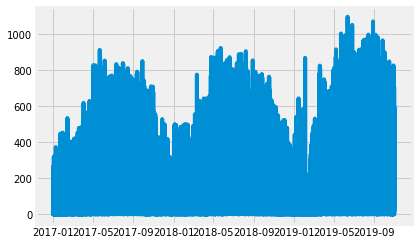

In [12]:
plt.plot(data['2017':][['Total']])

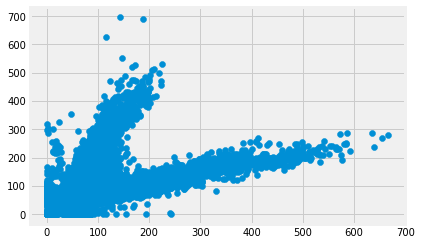

In [14]:
plt.scatter(data['2012':'2014'][['West']], data['2012':'2014'][['East']])

In [16]:
min(data.index)

Timestamp('2012-10-03 00:00:00')

In [17]:
max(data.index)

Timestamp('2019-10-31 23:00:00')

In [18]:
train = data[:'2018']

In [19]:
model = {'level': 'smooth trend', 
         'cycle':False, 
         'seasonal':None,}

#  fitting a model

In [20]:
gcag_mod = sm.tsa.UnobservedComponents(train['Total'], **model)
gcag_res = gcag_mod.fit()

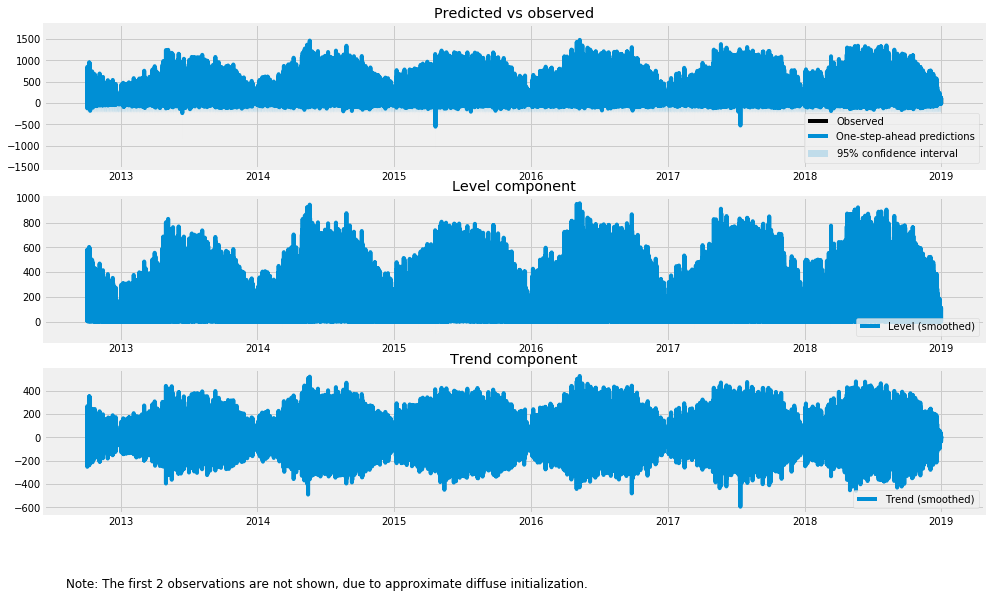

In [21]:
fig  = gcag_res.plot_components(legend_loc ='lower right', figsize=(15, 9))

In [24]:
num_steps = 30
predict_res = gcag_res.get_prediction(dynamic=train['Total'].shape[0]- num_steps)

predict = predict_res.predicted_mean
ci = predict_res.conf_int()

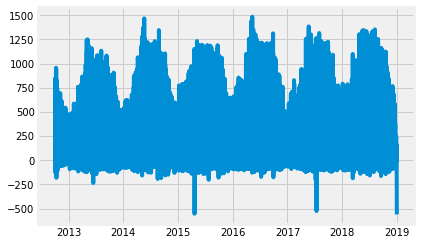

In [25]:
plt.plot(predict)

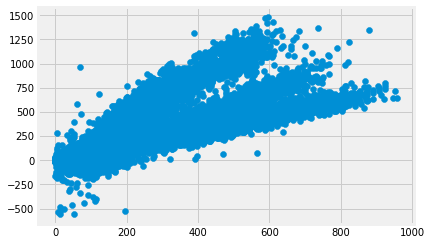

In [26]:
plt.scatter(train['Total'], predict)

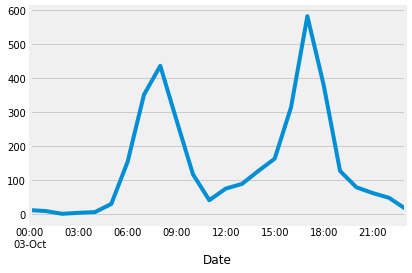

In [31]:
data['Total'][:24].plot()

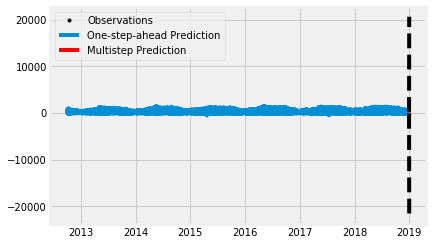

In [34]:
fig, ax = plt.subplots()
# Plot the results
ax.plot(train['Total'][:1], 'k.', label='Observations');
ax.plot(train.index[:-num_steps], predict[:-num_steps], label='One-step-ahead Prediction');

ax.plot(train.index[-num_steps:], predict[-num_steps:], 'r', label='Multistep Prediction');
ax.plot(train.index[-num_steps:], ci.iloc[-num_steps:], 'k--');

# Cleanup the image
legend = ax.legend(loc='upper left');

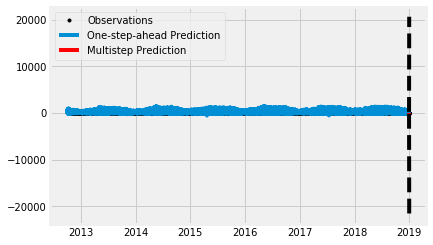

In [36]:
fig, ax = plt.subplots()
# Plot the results
ax.plot(train['East'], 'k.', label='Observations');
ax.plot(train.index[:-num_steps], predict[:-num_steps], label='One-step-ahead Prediction');

ax.plot(train.index[-num_steps:], predict[-num_steps:], 'r', label='Multistep Prediction');
ax.plot(train.index[-num_steps:], ci.iloc[-num_steps:], 'k--');

# Cleanup the image
legend = ax.legend(loc='upper left');

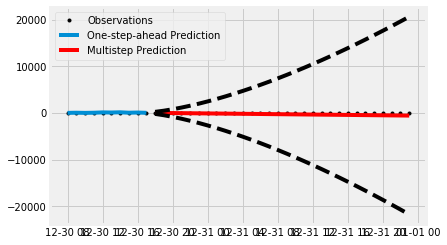

In [35]:
fig, ax = plt.subplots()
# Plot the results
ax.plot(train.index[-40:], train['East'][-40:], 'k.', label='Observations');
ax.plot(train.index[-40:-num_steps], predict[-40:-num_steps], label='One-step-ahead Prediction');

ax.plot(train.index[-num_steps:], predict[-num_steps:], 'r', label='Multistep Prediction');
ax.plot(train.index[-num_steps:], ci.iloc[-num_steps:], 'k--');

# Cleanup the image
legend = ax.legend(loc='upper left');

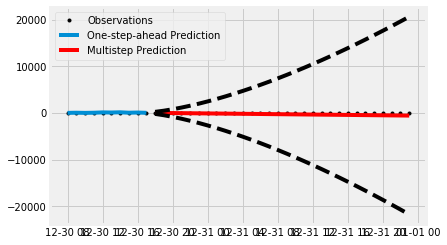

In [37]:
fig, ax = plt.subplots()
# Plot the results
ax.plot(train.index[-40:], train['West'][-40:], 'k.', label='Observations');
ax.plot(train.index[-40:-num_steps], predict[-40:-num_steps], label='One-step-ahead Prediction');

ax.plot(train.index[-num_steps:], predict[-num_steps:], 'r', label='Multistep Prediction');
ax.plot(train.index[-num_steps:], ci.iloc[-num_steps:], 'k--');

# Cleanup the image
legend = ax.legend(loc='upper left');

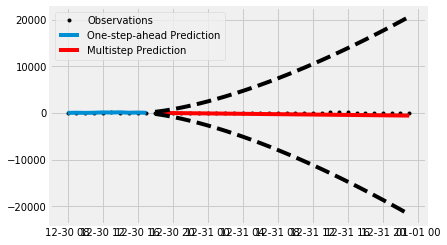

In [38]:
fig, ax = plt.subplots()
# Plot the results
ax.plot(train.index[-40:], train['Total'][-40:], 'k.', label='Observations');
ax.plot(train.index[-40:-num_steps], predict[-40:-num_steps], label='One-step-ahead Prediction');

ax.plot(train.index[-num_steps:], predict[-num_steps:], 'r', label='Multistep Prediction');
ax.plot(train.index[-num_steps:], ci.iloc[-num_steps:], 'k--');

# Cleanup the image
legend = ax.legend(loc='upper left');

## consider adding a seasonal term for 12 periods for the model fit above. Does this improve the fit of the model?

In [39]:
seasonal_model = {
    'level': 'local linear trend',
    'seasonal': 12
}
mod = sm.tsa.UnobservedComponents(train['Total'], **seasonal_model)
res = mod.fit(method='powell', disp=False)

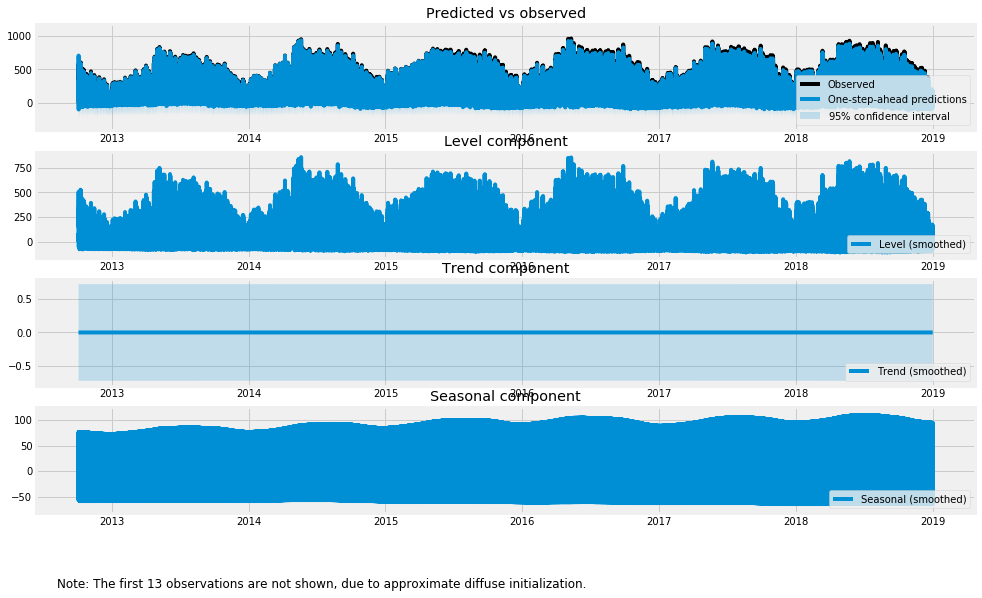

In [40]:
fig = res.plot_components(legend_loc='lower right', figsize=(15, 9));

# How does the model compare to the originl

In [41]:
pearsonr(gcag_res.predict(), train['Total'])

(nan, 1.0)

In [42]:
np.mean(np.abs(gcag_res.predict() - train['Total']))

56.899537910197175

In [43]:
np.mean(np.abs(res.predict() - train['Total']))

57.11071840410694

# Lets explore seasonality

In [44]:
seasonal_model = {
    'level': 'local level',
    'seasonal': 12
}
llmod = sm.tsa.UnobservedComponents(train['Total'], **seasonal_model)
ll_level_res = llmod.fit(method='powell', disp=False)

In [45]:
np.mean(np.abs(ll_level_res.predict() - train['Total']))

57.103146722492525

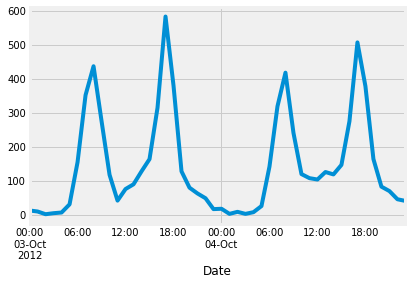

In [46]:
train[:48].Total.plot()

# Lets check correlations 

In [48]:
pearsonr(ll_level_res.predict(), train['Total'])

(nan, 1.0)

In [49]:
pearsonr(train['Total'].iloc[:-1, ], train['Total'].iloc[1:, ])

(nan, 1.0)

# Mean Absolute Error

In [50]:
np.mean(np.abs(ll_level_res.predict() - train['Total']))

57.103146722492525

In [52]:
np.mean(np.abs(train['Total'].iloc[:-1, ].values, train['Total'].iloc[1:, ].values))

nan